<a href="https://colab.research.google.com/github/manoj-dhakal/machine-learning/blob/main/Copy_of_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd


In [ ]:
data = pd.read_csv("train.csv", ",")
data.head()


<ipython-input-2-5b1cd68051af>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("train.csv", ",")


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
data.shape

(1000, 12)

In [ ]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
#converting to tensors
df = pd.DataFrame(data) #making a dataframe object for our case
tensor_data = torch.tensor(df.values, dtype = torch.float32)
print(tensor_data.shape)

torch.Size([1000, 12])


In [ ]:
#randomly shuffle data along the 0th dimension
indices = torch.randperm(tensor_data.shape[0])
tensor_data = tensor_data[indices]
print(tensor_data.shape)

torch.Size([1000, 12])


In [ ]:
y = tensor_data[:, -1]
y = y.reshape((y.shape[0], -1))
print(y.shape)

torch.Size([1000, 1])


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATA_SIZE = tensor_data.shape[0]

In [ ]:
mean_along = torch.mean(tensor_data, dim = 0)
std_along = torch.std(tensor_data, dim = 0)
normalized_data = (tensor_data-mean_along)/std_along
X = normalized_data[:, 3: -1]

train_data_X = X[:int(TRAIN_RATIO* DATA_SIZE),:]
train_data_y = y[:int(TRAIN_RATIO*DATA_SIZE),:]



test_data_X =  X[int(TRAIN_RATIO* DATA_SIZE):int((TEST_RATIO+TRAIN_RATIO)* DATA_SIZE),:]
test_data_y = y[ int(TRAIN_RATIO* DATA_SIZE):int((TEST_RATIO+TRAIN_RATIO)* DATA_SIZE),:]#not normalized version


val_data_X = X[int((TEST_RATIO+TRAIN_RATIO)* DATA_SIZE): ,:]
val_data_y = y[int((TEST_RATIO+TRAIN_RATIO)* DATA_SIZE): ,:]

print(train_data_X.shape)
print(test_data_X.shape)
print(val_data_X.shape)




torch.Size([800, 8])
torch.Size([100, 8])
torch.Size([100, 8])


In [ ]:
hidden_layer_size_1 = 128
hidden_layer_size_2 = 128
hidden_layer_size_3 = 128
model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], hidden_layer_size_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer_size_1, hidden_layer_size_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer_size_2, 1)

)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
)


In [18]:
criterion = torch.nn.L1Loss(reduction = "mean") #defining loss function

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.5)

In [20]:
num_epochs = 100
losses = []
val_losses = []
for epoch in range(num_epochs):
  predictions = model(train_data_X)
  loss = criterion(predictions, train_data_y)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss.item())
  optimizer.step()



  model.eval()  # Set the model in evaluation mode (no gradients)
  with torch.no_grad():
      val_predictions = model(val_data_X)
      val_loss = criterion(val_predictions, val_data_y)
  val_losses.append(val_loss.item())

  print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")




Epoch [1/100], Train Loss: 32206.8867, Val Loss: 84015.7891
Epoch [2/100], Train Loss: 77922.2734, Val Loss: 64724.3789
Epoch [3/100], Train Loss: 63458.5195, Val Loss: 55953.1406
Epoch [4/100], Train Loss: 53212.9883, Val Loss: 45135.0898
Epoch [5/100], Train Loss: 43556.9062, Val Loss: 57886.3008
Epoch [6/100], Train Loss: 56388.3203, Val Loss: 48753.1055
Epoch [7/100], Train Loss: 43386.7656, Val Loss: 43911.1016
Epoch [8/100], Train Loss: 37876.2383, Val Loss: 50400.7461
Epoch [9/100], Train Loss: 44936.3008, Val Loss: 48792.0195
Epoch [10/100], Train Loss: 41973.5312, Val Loss: 48069.9961
Epoch [11/100], Train Loss: 38613.1367, Val Loss: 49285.8984
Epoch [12/100], Train Loss: 41913.3047, Val Loss: 43368.4844
Epoch [13/100], Train Loss: 38337.2734, Val Loss: 39348.5859
Epoch [14/100], Train Loss: 34046.9609, Val Loss: 42707.6758
Epoch [15/100], Train Loss: 37988.8828, Val Loss: 43198.1562
Epoch [16/100], Train Loss: 38926.5391, Val Loss: 40874.8594
Epoch [17/100], Train Loss: 36495

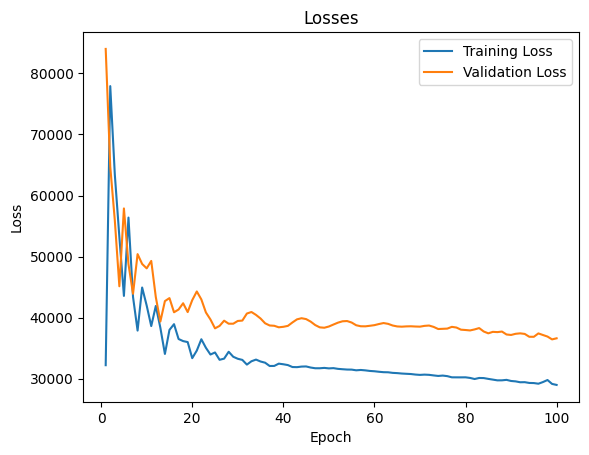

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs+1), losses, label = "Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.title('Losses')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [ ]:
model.eval()

Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
)

In [22]:

with torch.no_grad():  # We don't need gradients during inference
    predictions = model(test_data_X)
pred = []
data = []
for i, j in zip(predictions, test_data_y):
  pred.append(i.item())
  data.append(j.item())




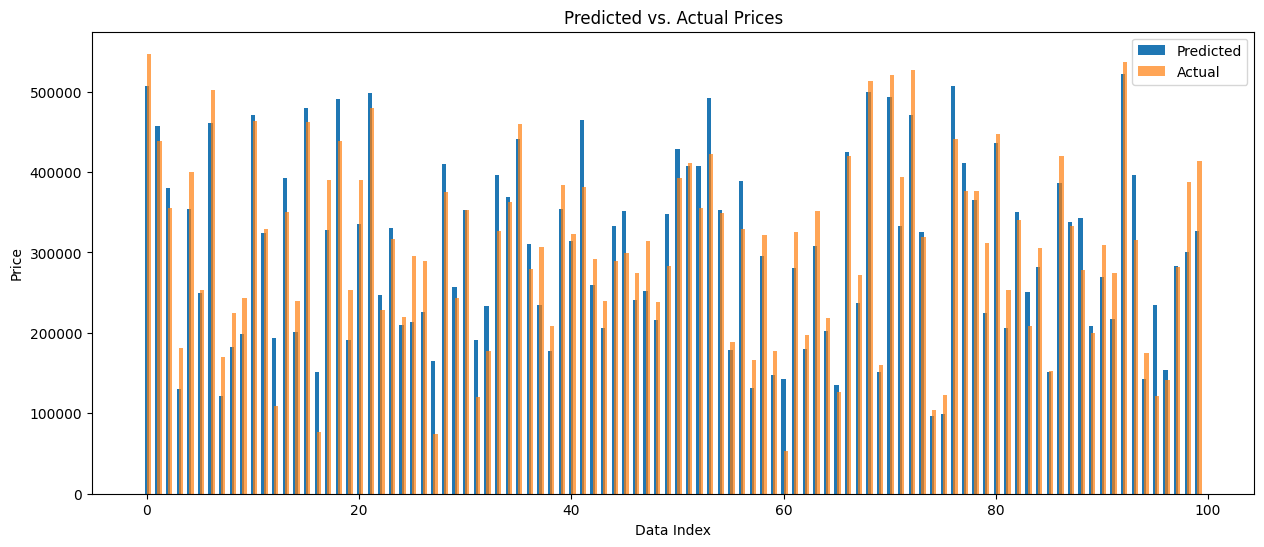

In [23]:
# Create an index range for the data points
index = range(len(pred))

# Plot the comparison in a bar graph
plt.figure(figsize=(15, 6))
plt.bar(index, pred, width=0.4, align='center', label='Predicted')
plt.bar(index, data, width=0.4, align='edge', label='Actual', alpha=0.7)
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Prices')
plt.legend()
plt.show()